# [WIP] OrderedProbit examples

Note: This is running PyMC v4. The latest (as of 14th Nov 2021) which includes [#5141](https://github.com/pymc-devs/pymc/pull/5141) merged.

This notebook is a work in progress and attempts to be a more up to date PyMC implementation of https://nbviewer.org/github/JWarmenhoven/DBDA-python/blob/master/Notebooks/Chapter%2023.ipynb

Once everything is working ok, then the goal is to provide a complete `pymc-examples` notebook on ordinal regression.

In [1]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import aesara.tensor as at

pm.__version__

You are running the v4 development version of PyMC which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc/tree/v3


'4.0.0'

In [2]:
%config InlineBackend.figure_format = 'retina'

## Load data

💣 Note: `y` observations must start at 0, not 1. 💣

K = 7
K-1 = 6 thresholds


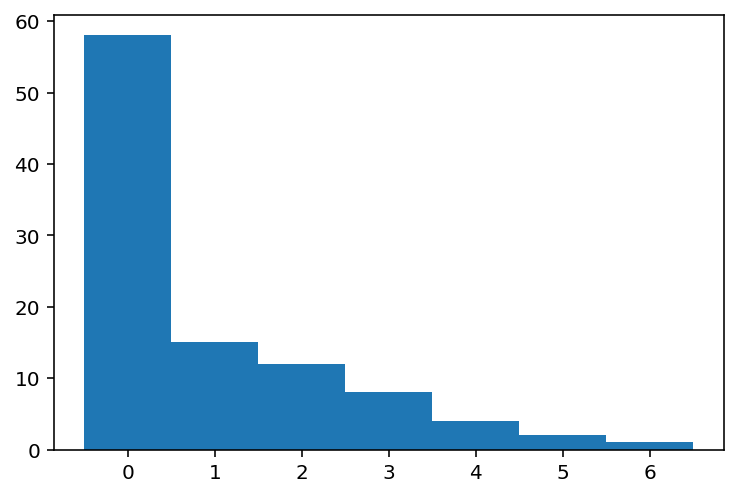

In [3]:
#df = pd.read_csv('OrdinalProbitData-1grp-1.csv')
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
              2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
              4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 7]) - 1

K = len(np.unique(y))
print(f"K = {K}")
print(f"K-1 = {K-1} thresholds")

plt.hist(y, bins=np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])-1);

## Naive, over-parameterized, model

[1.5 2.5 3.5 4.5 5.5 6.5]


/var/folders/3d/p29f9frn6d3c3gnfq2bxbd1c0000gn/T/ipykernel_32202/3679536251.py:14: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(start={"cutpoints": initial})
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/benjamv/opt/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/aesara/tensor/elemwise.py:793: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/benjamv/git/pymc/pymc/model.py:925: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
/Users/benjamv/opt/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/aesara/tensor/elemwise.py:793: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cutpoints, mu, sigma]
/Users/benjamv/git/pymc/pymc/mode

/Users/benjamv/opt/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/aesara/compile/function/types.py:976: RuntimeWarning: invalid value encountered in add
  self.fn()
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.


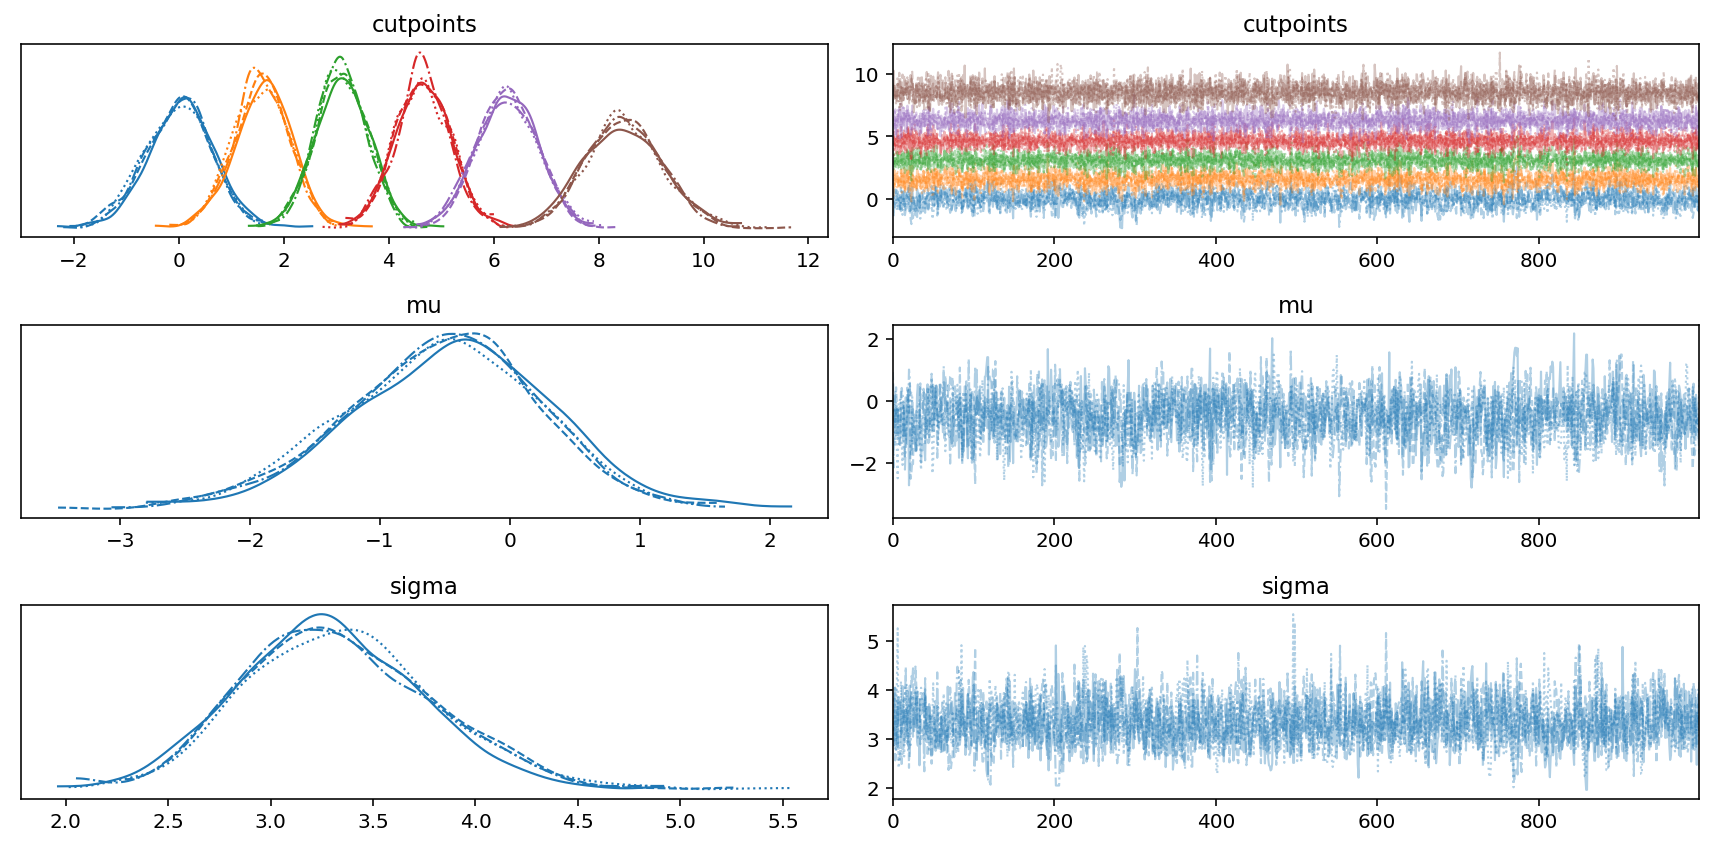

In [4]:
initial = np.arange(K-1)+1.5
print(initial)

with pm.Model() as model:
    cutpoints = pm.Normal("cutpoints", 
                          mu=initial, 
                          sigma=1, 
                          shape=K-1,
                          transform=pm.distributions.transforms.ordered)
    mu = pm.Normal('mu', mu=K/2, sigma=K)
    sigma = pm.HalfNormal("sigma", 1)
    pm.OrderedProbit("y_obs", cutpoints=cutpoints, eta=mu, sigma=sigma, observed=y)
    
    trace = pm.sample(start={"cutpoints": initial})
    
# pm.model_to_graphviz(model)

az.plot_trace(trace, var_names=["cutpoints", "mu", "sigma"]);
plt.tight_layout()

This only looks vaguely sensible because the sd on the cutpoints is low. Fundamentally, the model is overparameterized, running inference with higher sd for the cutpoints shows this.

/var/folders/3d/p29f9frn6d3c3gnfq2bxbd1c0000gn/T/ipykernel_32202/4238562227.py:14: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(start={"cutpoints": initial})
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


[1.5 2.5 3.5 4.5 5.5 6.5]


/Users/benjamv/opt/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/aesara/tensor/elemwise.py:793: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/benjamv/git/pymc/pymc/model.py:925: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
/Users/benjamv/opt/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/aesara/tensor/elemwise.py:793: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cutpoints, mu, sigma]
You are running the v4 development version of PyMC which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc/tree/v3
You are running the v4 development version of PyMC which currently still lacks key features. You

/Users/benjamv/opt/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/aesara/compile/function/types.py:976: RuntimeWarning: invalid value encountered in add
  self.fn()
/Users/benjamv/opt/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/aesara/compile/function/types.py:976: RuntimeWarning: invalid value encountered in add
  self.fn()
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


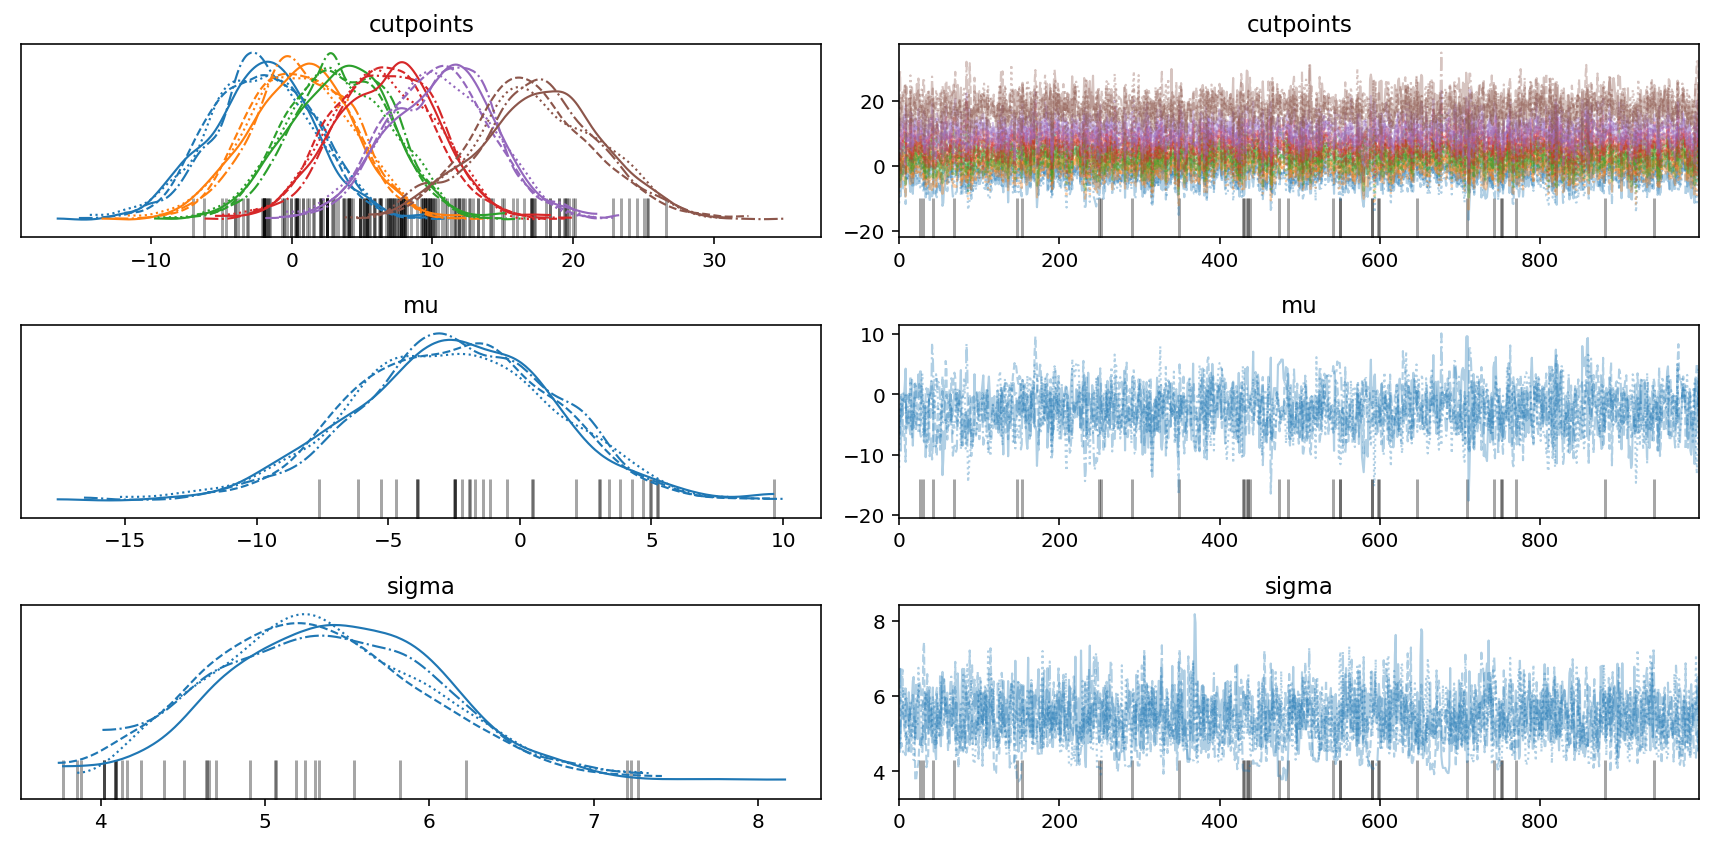

In [5]:
initial = np.arange(K-1)+1.5
print(initial)

with pm.Model() as model:
    cutpoints = pm.Normal("cutpoints", 
                          mu=initial, 
                          sigma=10,  # <------------------------ HIGHER STD HERE
                          shape=K-1,
                          transform=pm.distributions.transforms.ordered)
    mu = pm.Normal('mu', mu=K/2, sigma=K)
    sigma = pm.HalfNormal("sigma", 1)
    pm.OrderedProbit("y_obs", cutpoints=cutpoints, eta=mu, sigma=sigma, observed=y)
    
    trace = pm.sample(start={"cutpoints": initial})
    
# pm.model_to_graphviz(model)

az.plot_trace(trace, var_names=["cutpoints", "mu", "sigma"]);
plt.tight_layout()

Now we have completely different estimates for the cutpoints, mu, and sigma.

# Let's avoid over-parameterization

There are $K$ ordinal levels of the data.

But the model has $K+1$ parameters: $\theta_1, \ldots, \theta_{K-1}, \mu, \sigma$.

So we have to reduce the degrees of freedom by 2.

We don't want to eliminate the mean by setting $\mu=0$ because having $\mu$ vary will be crucial when we have predictor variables.

## Lowest and highest cutpoints are constrained

Kruschke's approach is to pin down the lowest and the highest cutpoints such that:
- $\theta_1 = 1+0.5$
- $\theta_{K-1} = K-1+0.5$

For example, for a 7 point Likert scale, the first cutpoint would be 1.5 and the last would be 6.5.

/var/folders/3d/p29f9frn6d3c3gnfq2bxbd1c0000gn/T/ipykernel_32202/476466621.py:13: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(start={"cutpoints_unknown": initial})
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


[2.5 3.5 4.5 5.5]


/Users/benjamv/git/pymc/pymc/model.py:925: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cutpoints_unknown, mu, sigma]
You are running the v4 development version of PyMC which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc/tree/v3
You are running the v4 development version of PyMC which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc/tree/v3
You are running the v4 development version of PyMC which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc/

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
There were 133 divergences after tuning. Increase `target_accept` or reparameterize.
There were 108 divergences after tuning. Increase `target_accept` or reparameterize.
There were 130 divergences after tuning. Increase `target_accept` or reparameterize.
There were 183 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


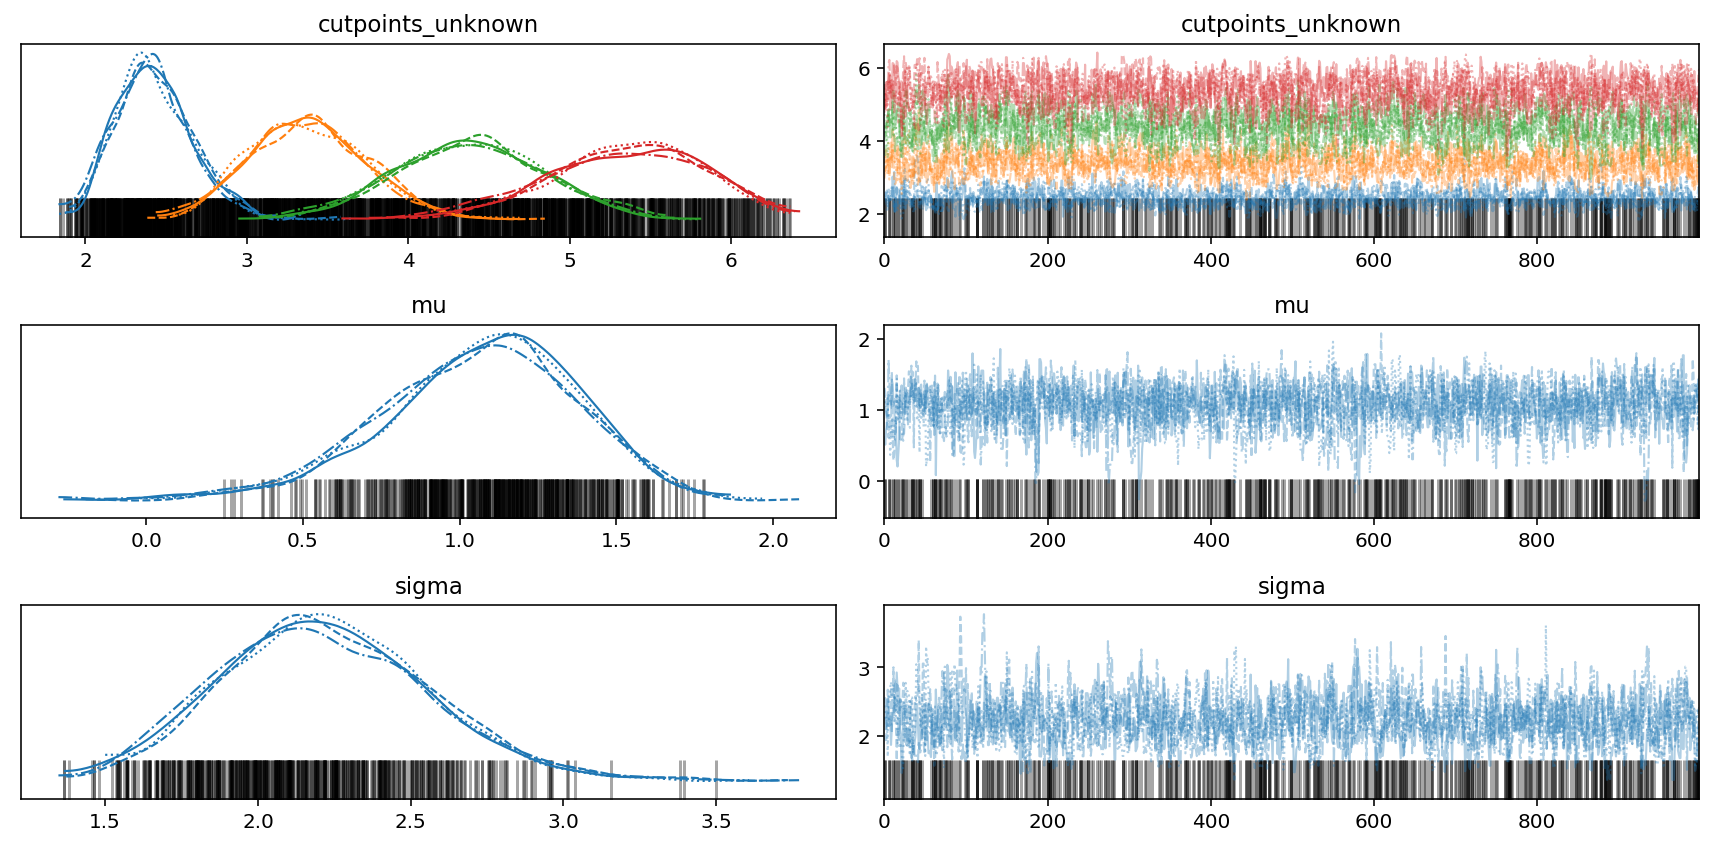

In [6]:
initial = np.arange(K-1-2)+2.5
print(initial)

with pm.Model() as model:
    cutpoints = at.concatenate([
        np.ones(1)*1.5,
        pm.Uniform("cutpoints_unknown", lower=1+0.5, upper=K-0.5, shape=K-1-2), #  transform=pm.distributions.transforms.ordered),
        np.ones(1)*(K-0.5)
    ])
    mu = pm.Normal('mu', mu=K/2, sigma=K)
    sigma = pm.HalfNormal("sigma", 1)
    pm.OrderedProbit("y_obs", cutpoints=cutpoints, eta=mu, sigma=sigma, observed=y)
    trace = pm.sample(start={"cutpoints_unknown": initial})

# pm.model_to_graphviz(model)

az.plot_trace(trace, var_names=["cutpoints_unknown", "mu", "sigma"]);
plt.tight_layout()

So this is 'fine' in that the posteriors are reasonable (compare the [DBA converted to PyMC post](https://nbviewer.org/github/JWarmenhoven/DBDA-python/blob/master/Notebooks/Chapter%2023.ipynb)). But we've got an intense divergence problem.

Note that the divergences do _not_ resolve if we use `pm.distributions.transforms.ordered` on the uniform distribution of unknown cutpoints.

## Fix lowest cutpoint to zero and constrain sum of cutpoints to be 1
Another approach, suggested by Adrian, is to fix the lower cutpoint to zero and use a Dirichlet distribution for the remaining unknown cutpoints. This has one less degree of freedom (I believe) because the sum of the Dirichlet distributed cutpoints will be 1.

/var/folders/3d/p29f9frn6d3c3gnfq2bxbd1c0000gn/T/ipykernel_32202/1406623870.py:12: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(start={"cutpoints_unknown": initial})
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


[0.1 0.3 0.5 0.7 0.9]


/Users/benjamv/git/pymc/pymc/model.py:925: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cutpoints_unknown, mu, sigma]
You are running the v4 development version of PyMC which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc/tree/v3
You are running the v4 development version of PyMC which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc/tree/v3
You are running the v4 development version of PyMC which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc/

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
There were 223 divergences after tuning. Increase `target_accept` or reparameterize.
There were 230 divergences after tuning. Increase `target_accept` or reparameterize.
There were 243 divergences after tuning. Increase `target_accept` or reparameterize.
There were 266 divergences after tuning. Increase `target_accept` or reparameterize.


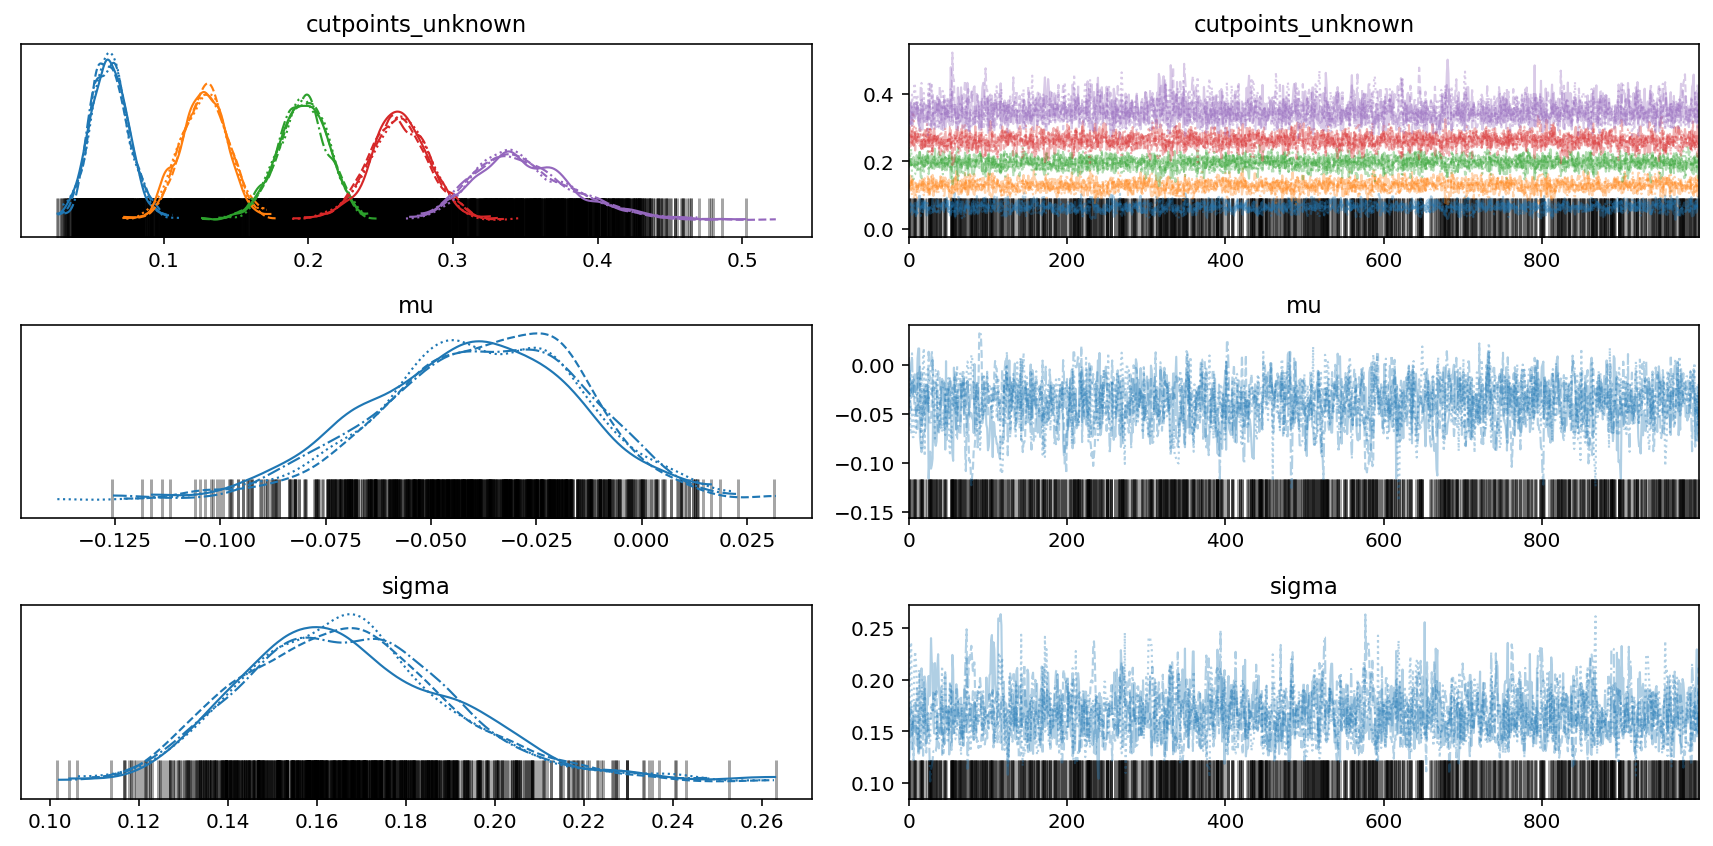

In [7]:
initial = np.linspace(0.1, 0.9, K-2)
print(initial)

with pm.Model() as model:
    cutpoints = at.concatenate([
        np.zeros(1),
        pm.Dirichlet("cutpoints_unknown", a=np.ones(K - 1 - 1))
    ])
    mu = pm.Normal('mu', mu=K/2, sigma=K)
    sigma = pm.HalfNormal("sigma", 1)
    pm.OrderedProbit("y_obs", cutpoints=cutpoints, eta=mu, sigma=sigma, observed=y)
    trace = pm.sample(start={"cutpoints_unknown": initial})
    
# pm.model_to_graphviz(model)

az.plot_trace(trace, var_names=["cutpoints_unknown", "mu", "sigma"]);
plt.tight_layout()